# Bibliotek

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# Analyse

## Albedo

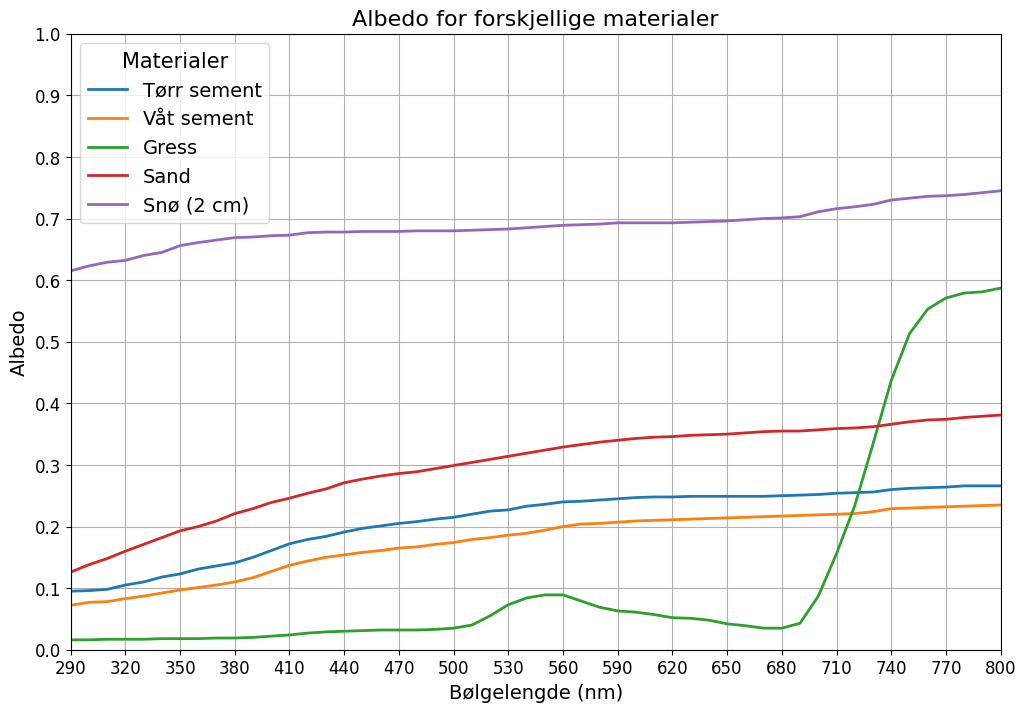

In [23]:
Albedopaths: list[list[str]] = [
    ['Data/Albedo/cdry.dat', 'Tørr sement'],
    ['Data/Albedo/cwet.dat', 'Våt sement'],
    ['Data/Albedo/gras.dat', 'Gress'],
    ['Data/Albedo/sand.dat', 'Sand'],
    ['Data/Albedo/sno2.dat', 'Snø (2 cm)']
]

colors = plt.get_cmap('tab10').colors
norm = plt.Normalize(0, len(Albedopaths))

plt.figure(figsize=(12, 8))
for i, (path, name) in enumerate(Albedopaths):
    data = np.loadtxt(path)
    plt.plot(data[:,0], data[:,1], label=name, color=colors[i], linewidth=2)
plt.legend(title='Materialer', fontsize=14, title_fontsize=15, loc='upper left')
plt.xlabel('Bølgelengde (nm)',fontsize=14)
plt.ylabel('Albedo',fontsize=14)
plt.title('Albedo for forskjellige materialer',fontsize=16)

plt.xlim(290, 800)
plt.ylim(0, 1)

plt.xticks(np.arange(290, 800+1, 30), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid()
plt.show()
